## Data Loading

In [11]:
import pandas as pd

df = pd.read_csv('heart_statlog_cleveland_hungary_final.csv')
df.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [12]:
df.shape

(1190, 12)

## Data Cleaning

In [13]:
print(df.duplicated().sum())

272


In [14]:
df.drop_duplicates(inplace=True)
print(df.duplicated().sum())

0


In [15]:
df.shape

(918, 12)

## Data Splitting

In [16]:
from sklearn.model_selection import train_test_split

X = df.iloc[:, :11]
Y = df.iloc[:, 11]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

## Model Building (Powerful Machine Learning Models)

In [17]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

import os
os.environ["LOKY_MAX_CPU_COUNT"] = "8"

rfc = RandomForestClassifier(random_state=42)
abc = AdaBoostClassifier(random_state=42)
gbc = GradientBoostingClassifier(random_state=42)
xgbc = XGBClassifier(random_state=42)
xgbc_rf = XGBRFClassifier(random_state=42)
lgbmc = LGBMClassifier(random_state=42)
cbc = CatBoostClassifier(verbose=0, random_state=42)

classifier_model_dict = {
    'Random Forest Classifier': rfc,
    'AdaBoost Classifier': abc,
    'Gradient Boosting Classifier': gbc,
    'XGBoost Classifier': xgbc,
    'XGBoost RF-Booster': xgbc_rf,
    'LightGBM Classifier': lgbmc,
    'CatBoost Classifier': cbc
}

for model_name, model in classifier_model_dict.items():
    print(f'\n-------------------- {model_name} --------------------')
    model.fit(X_train, Y_train)
    Y_pred_train = model.predict(X_train)
    Y_pred_test = model.predict(X_test)
    
    print("\n🟩 ----- Train Metrics -----")
    print(f"Accuracy  : {accuracy_score(Y_train, Y_pred_train):.4f}")
    print(f"Precision : {precision_score(Y_train, Y_pred_train):.4f}")
    print(f"Recall    : {recall_score(Y_train, Y_pred_train):.4f}")
    print(f"F1-Score  : {f1_score(Y_train, Y_pred_train):.4f}")

    print("\n🟦 ----- Test Metrics -----")
    print(f"Accuracy  : {accuracy_score(Y_test, Y_pred_test):.4f}")
    print(f"Precision : {precision_score(Y_test, Y_pred_test):.4f}")
    print(f"Recall    : {recall_score(Y_test, Y_pred_test):.4f}")
    print(f"F1-Score  : {f1_score(Y_test, Y_pred_test):.4f}")


-------------------- Random Forest Classifier --------------------

🟩 ----- Train Metrics -----
Accuracy  : 1.0000
Precision : 1.0000
Recall    : 1.0000
F1-Score  : 1.0000

🟦 ----- Test Metrics -----
Accuracy  : 0.9022
Precision : 0.9255
Recall    : 0.9085
F1-Score  : 0.9169

-------------------- AdaBoost Classifier --------------------

🟩 ----- Train Metrics -----
Accuracy  : 0.8692
Precision : 0.8736
Recall    : 0.8837
F1-Score  : 0.8786

🟦 ----- Test Metrics -----
Accuracy  : 0.8804
Precision : 0.9338
Recall    : 0.8598
F1-Score  : 0.8952

-------------------- Gradient Boosting Classifier --------------------

🟩 ----- Train Metrics -----
Accuracy  : 0.9393
Precision : 0.9296
Recall    : 0.9593
F1-Score  : 0.9442

🟦 ----- Test Metrics -----
Accuracy  : 0.8696
Precision : 0.9267
Recall    : 0.8476
F1-Score  : 0.8854

-------------------- XGBoost Classifier --------------------

🟩 ----- Train Metrics -----
Accuracy  : 1.0000
Precision : 1.0000
Recall    : 1.0000
F1-Score  : 1.0000

🟦 

In [18]:
Y_pred_train = model.predict(X_train)
Y_pred_test = model.predict(X_test)

print(f"Train Accuracy: {accuracy_score(Y_train, Y_pred_train):.4f}")
print(f"Test Accuracy : {accuracy_score(Y_test, Y_pred_test):.4f}")

Train Accuracy: 0.9720
Test Accuracy : 0.9094


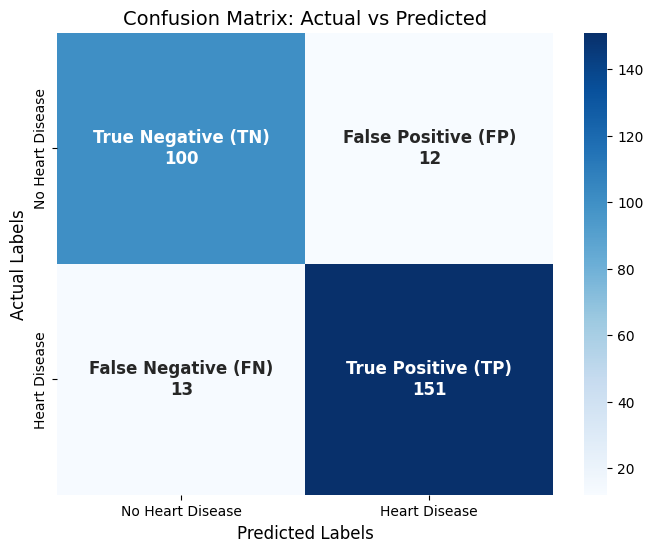

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

cm = confusion_matrix(Y_test, Y_pred_test)
class_names = ['No Heart Disease', 'Heart Disease']
tn, fp, fn, tp = cm.ravel()
labels = [f'True Negative (TN)\n{tn}', f'False Positive (FP)\n{fp}', f'False Negative (FN)\n{fn}', f'True Positive (TP)\n{tp}']
labels = np.asarray(labels).reshape(2,2)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues', xticklabels=class_names, yticklabels=class_names, annot_kws={"size": 12, "weight": "bold"})
plt.xlabel('Predicted Labels', fontsize=12)
plt.ylabel('Actual Labels', fontsize=12)
plt.title('Confusion Matrix: Actual vs Predicted', fontsize=14)
plt.show()

In [20]:
import pickle

with open('CatBoost_ML_Model.pkl', 'wb') as file:
    pickle.dump(cbc, file)
    
with open('CatBoost_ML_Model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)
    
print('Accuracy Score of Loaded Model :', loaded_model.score(X_test, Y_test))

Accuracy Score of Loaded Model : 0.9094202898550725
